In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

In [3]:
# 이미지 증식 객체
# 객체 속성 중 ***_range로 설정된 값들은 범위를 의미
# 새로운 이미지를 생성할 때마다 새로운 값으로 랜덤하게 적용됨

# rescale : 이미지 ㄱ밧을 0과 1사이로 변경(정규화 개념)
# rotation_range : 회전시키기, 90(0~90)사이의 값으로 랜덤하게 선택 / 15도를 기준으로 랜덤하게 회전(15도씩)
# width_shift_range : 수평이동, (0~1)사이의 범위에서 비율에 따라 랜덤하게 이동 / 0.1은 10% 좌,우 이동
# height_shift_range : 랜덤하게 10% 상,하 이동
# shear_range : 변형시키기(반시계)
# zoom_range : 확대,축소 시키기(0.8~2.0 범위에서 랜덤하게 확대, 축소)
# vertical_flip : 수직 방향 뒤집기
# fill_mode : 이미지에 생기는 빈 공백을 채우는 방식 결정
# nearest : 빈 공간과 가장 가까운 곳의 픽셀 값으로 채우기
# reflect : 빈공간 만큼의 영역을 근처 공간의 반전된 이미지로 채우기
# wrap : 빈공간을 이동하면서 잘려나간 이미지로 채우기
# constant : 빈공간을 검정 또는 흰색으로 채우기 / cval 속성 사용(0은 검정, 1은 흰색 채우기)

imgGen = ImageDataGenerator(rescale= 1. / 255,
                           rotation_range= 15,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           shear_range=0.5,
                           zoom_range=[0.8,2.0],
                           horizontal_flip=True,
                           vertical_flip=True,
                           fill_mode="nearest")

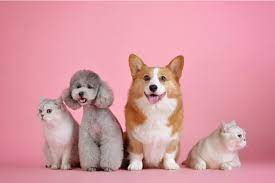

In [5]:
# 이미지 읽어들일 때는 튜플 방식
img = load_img(("./images/dog.jpg"))
img

In [6]:
# 이미지를 array(배열)로 추출
x = img_to_array(img)
x

array([[[233., 157., 169.],
        [234., 158., 170.],
        [234., 158., 170.],
        ...,
        [250., 172., 196.],
        [250., 172., 196.],
        [250., 172., 196.]],

       [[202., 124., 137.],
        [201., 125., 137.],
        [202., 124., 137.],
        ...,
        [224., 146., 170.],
        [224., 146., 170.],
        [225., 145., 170.]],

       [[203., 123., 136.],
        [201., 123., 136.],
        [203., 123., 136.],
        ...,
        [224., 144., 169.],
        [224., 144., 169.],
        [226., 143., 169.]],

       ...,

       [[210., 131., 150.],
        [210., 131., 150.],
        [210., 131., 150.],
        ...,
        [229., 149., 174.],
        [229., 149., 174.],
        [229., 149., 174.]],

       [[211., 132., 151.],
        [211., 132., 151.],
        [211., 132., 151.],
        ...,
        [229., 149., 174.],
        [229., 149., 174.],
        [229., 149., 174.]],

       [[211., 132., 151.],
        [211., 132., 151.],
        [211., 1

In [7]:
# 4차원으로 만들기 
# 너비 * 높이 형태의 데이터 구조로 만들기
# 차원은 행하나 추가 : 맨 앞에(이미지 한개)
x = x.reshape((1, )+x.shape)
x.shape

(1, 183, 275, 3)

In [10]:
# 생성할 이미지 개수를 카운트할 변수
i = 0
for batch in imgGen.flow(x,
                        save_to_dir="./images/",
                        save_prefix="dog_new_",
                        save_format="png"):
    i += 1
    # 100개 이미지 생성
    if i>99:
        break